Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [236]:
from random import random, seed
from itertools import product
import numpy as np
from tqdm.auto import tqdm
from icecream import ic
import matplotlib.pyplot as plt
from itertools import accumulate

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [237]:
UNIVERSE_SIZE = 1000
NUM_SETS = 100
DENSITY = 0.2

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [238]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

## Helper Functions

In [239]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

## Resolution

In [240]:
#Tweak function

def tweak(solution):
    new_solution = solution.copy()
    index = None
    while index is None or np.random.random() < 0.4:
        index = np.random.randint(0, NUM_SETS)
        new_solution[index] = not new_solution[index]
    return new_solution

In [241]:
solution = np.full(NUM_SETS, True)

history = [(cost(solution),1)]
print(f"Initial cost : {cost(solution)}")
if valid(solution):
    for n in tqdm(range(UNIVERSE_SIZE)):
        new_solution = tweak(solution)
        
        #Record solutions: 1 -> valid, 0 -> invalid
        if valid(new_solution) and cost(new_solution) < cost(solution):
            solution = new_solution
            history.append((cost(new_solution),1))
        else:
            history.append((cost(new_solution),0))

    print(f"Final cost : {cost(solution)}")
    print(f"Number of sets used: {solution.sum()} over {NUM_SETS}")
    print(f"Last improvement at: {history.index((cost(solution),1))}")

else:
    print("impossible to find a solution")

Initial cost : 33457.44586335025


100%|██████████| 1000/1000 [00:00<00:00, 26401.35it/s]

Final cost : 7140.396994155382
Number of sets used: 22 over 100
Last improvement at: 437


Text(0, 0.5, 'Cost Value')

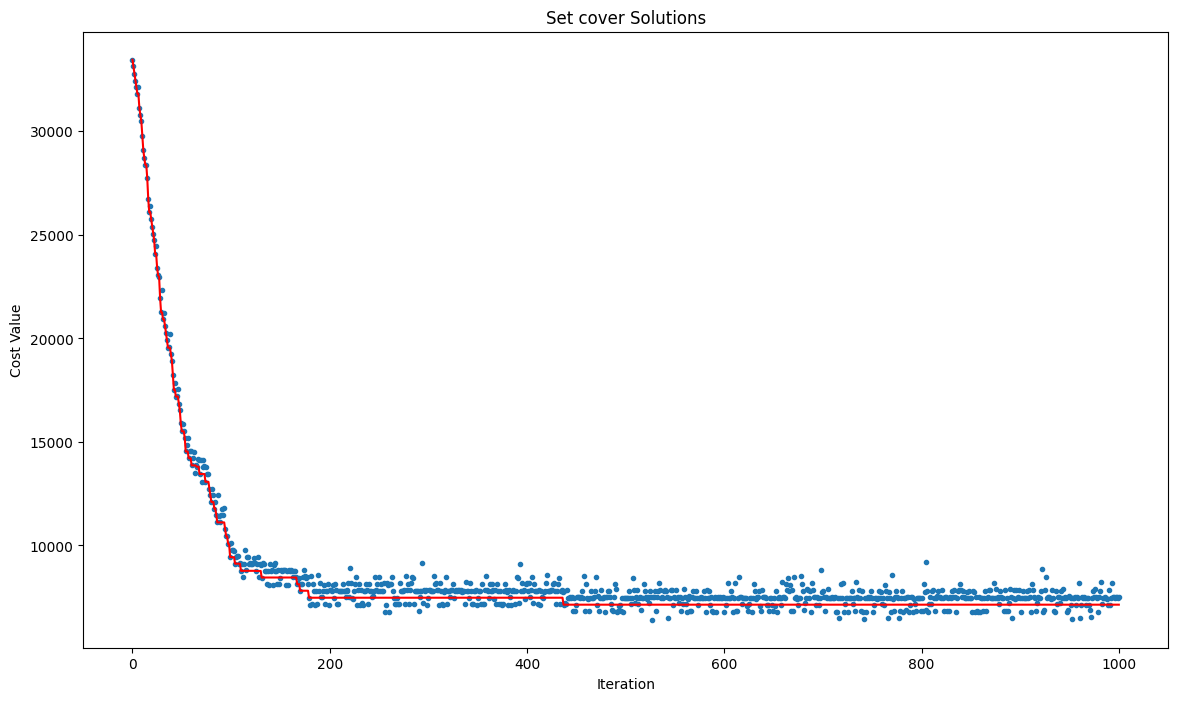

In [242]:
#Array of progressive valid minimum

progressive_min = []
for c in history:
    if c[1] == 1:
        min = c[0]
        progressive_min.append(c[0])
    else:
        progressive_min.append(min)

#Array of all costs only
costs = [sol[0] for sol in history]

#Plot
plt.figure(figsize=(14, 8))
plt.title("Set cover Solutions")

plt.plot(
    range(len(progressive_min)),
    progressive_min,
    color="red",
)
plt.scatter(range(len(costs)), costs, marker=".")

plt.xlabel('Iteration')
plt.ylabel('Cost Value')